In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from nilearn import image
from nilearn.glm.first_level import FirstLevelModel, make_first_level_design_matrix
from nilearn.plotting import plot_design_matrix, plot_stat_map
from nilearn.interfaces.fmriprep import load_confounds
sys.path.append('..')
from utils.data import Subject, load_participant_list

In [4]:
base_dir = '/home/ubuntu/data/learning-habits'
bids_dir = '/home/ubuntu/data/learning-habits/bids_dataset/derivatives/fmriprep-23.2.1/'

sub_ids = load_participant_list(base_dir)

In [5]:
#subjects = [Subject(base_dir, sub_id, include_modeling=True, include_imaging=True, bids_dir=bids_dir) for sub_id in sub_ids]
subject = Subject(base_dir, '01', include_modeling=True, include_imaging=True, bids_dir=bids_dir)

# Setting parameters

In [7]:
tr = 2.33384
hrf_model = 'spm'
noise_model = 'ar1'
smoothing_fwhm = 5
high_pass = 0.01
motion_type = 'basic'

run = 'learning1'
# ref to the block
block = getattr(subject, run)

# Get the data

In [9]:
events = block.extend_events_df()
events.head(5)

,onset,duration,trial_type,trial,first_stim_value_rl,first_stim_value_ck
0,0.009399,0.817157,first_stim_presentation,1,1.830729,0.0
1,0.826556,0.934432,second_stim_presentation,1,0.000000,0.0
2,1.760988,0.000000,response,1,0.000000,0.0
3,1.766016,1.569584,purple_frame,1,0.000000,0.0
4,2.268539,1.067061,points_feedback,1,0.000000,0.0


In [14]:
img_path = subject.img.get(run)
fmri_img = image.load_img(img_path)

In [19]:
import os

In [21]:
os.cpu_count()

8

In [15]:
confounds, sample_mask  = subject.load_confounds(run, motion_type=motion_type)

In [16]:
confounds.head(2)

,csf,rot_x,rot_y,rot_z,trans_x,trans_y,trans_z,white_matter,cosine00,cosine01,cosine02,cosine03,cosine04
0,27.856635,-0.006275,-0.001482,-0.001769,0.107316,-0.098024,0.197327,8.010894,0.070067,0.069900,0.069988,0.069599,0.069176
1,-6.503313,-0.004784,-0.001140,-0.001838,0.107326,-0.082120,0.234554,3.195605,0.070064,0.069885,0.069955,0.069539,0.069082


In [17]:
n = fmri_img.shape[-1]
frametimes = np.linspace(tr/2., (n - .5)*tr, n) # from Gilles, checked with nilearn FirstLevelModel

In [18]:
X1 = make_first_level_design_matrix(frame_times=frametimes,
                                    events=events,
                                    hrf_model=hrf_model,
                                    drift_model=None,
                                    high_pass=high_pass,
                                    add_regs=confounds)

/home/ubuntu/miniforge3/envs/neuroim/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:142: UserWarning: The following conditions contain events with null duration:
response.
  warnings.warn(
/home/ubuntu/miniforge3/envs/neuroim/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: first_stim_value_ck, first_stim_value_rl, trial
  warnings.warn(


In [ ]:
model1 = FirstLevelModel(smoothing_fwhm=smoothing_fwhm)
model1 = model1.fit(fmri_img, design_matrices=X1, sample_masks=sample_mask)

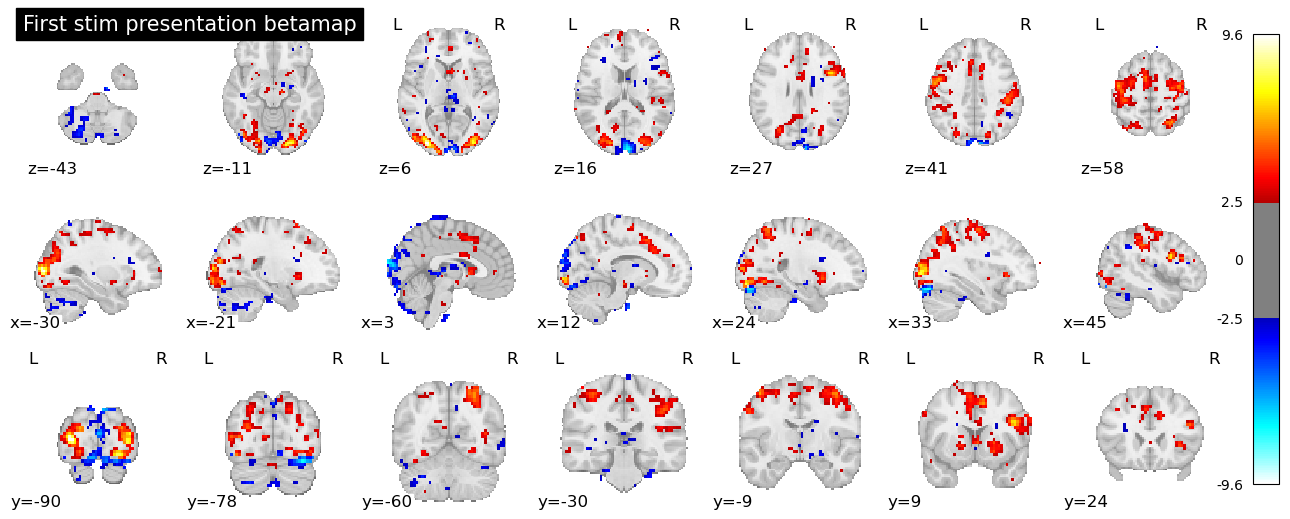

In [ ]:
z_map1 = model1.compute_contrast(
    contrast_def="first_stim_presentation", output_type="z_score"
)

plot_stat_map(
    z_map1,
    threshold=2.5,
    display_mode="mosaic",
    title=f"First stim presentation betamap",
)